# ------------------------------------------ Mini Project -----------------------------------------------

## From the given dataset this are the requirement that to be obtained by performing the exploratory data analysis.

### 1. How many categorical variables does the data contain? Please state the number of categories for each such variable.


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
df_suicide = pd.read_csv('data.csv')
df_suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
df_suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [4]:
df_suicide.duplicated().sum()

0

In [5]:
df_suicide.shape

(27820, 12)

In [6]:
df_suicide_copy = df_suicide.copy()
df_suicide_copy[' gdp_for_year ($) '] = df_suicide_copy[' gdp_for_year ($) '].str.replace(',','').astype('float64')
print("categorical variables : [ categories ]\n**************************************")
i=0
for var in df_suicide_copy.select_dtypes(exclude=['int64', 'float64']).columns:
#for var in df_suicide.select_dtypes(include=['object']).columns:
    print(i+1,". ",var, ": ", df_suicide_copy[var].unique())
    i+=1
print("\nThe total number of categorical variables after treatment = ", i)

categorical variables : [ categories ]
**************************************
1 .  country :  ['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent 

### 2. How strong is the correlation between HDI and suicides_no?


In [7]:
df_temp = df_suicide[[ 'HDI for year', 'suicides_no']].copy()
df_temp.head(5)

,HDI for year,suicides_no
0,NaN,21
1,NaN,16
2,NaN,14
3,NaN,1
4,NaN,9


In [8]:
df_temp.duplicated().sum()

19649

In [9]:
df_temp.drop_duplicates(keep='first',inplace=True)
df_temp.shape

(8171, 2)

In [10]:
print("suicides_no : missing values: ", df_temp['suicides_no'].isnull().sum(), " which is ", round((df_temp['suicides_no'].isnull().sum()*100)/df_temp['suicides_no'].shape[0],2),"% of the total number of entries in suicides_no")
print("HDI for year : missing values: ", df_temp['HDI for year'].isnull().sum(), " which is ", round((df_temp['HDI for year'].isnull().sum()*100)/df_temp['HDI for year'].shape[0],2),"% of the total number of entries in HDI for year")

suicides_no : missing values:  0  which is  0.0 % of the total number of entries in suicides_no
HDI for year : missing values:  1807  which is  22.11 % of the total number of entries in HDI for year


In [11]:
def more_outliers(x):
    y=len(x)
    z=x.isna().sum() 
    if ((y==z) | (((z*100)/y)>=40)): 
        return np.nan
    x= x.dropna(axis = 0, how ='any')
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    if ((((x < (Q1 - 1.5 * IQR)) | (x > (Q3 + 1.5 * IQR))).sum())*100)/x.shape[0] >= 50: 
        return round(x.median(),3)
    else:  
        return round(x.mean(),3)

The correlation between HDI and suicides_no after imputation is:  0.154


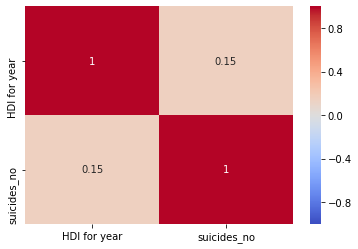

In [13]:
#ax.get_ylim()
ax=sns.heatmap(df_temp_mean.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm') 
ax.set_ylim(2.0, 0) 
print('The correlation between HDI and suicides_no after imputation is: ', round(df_temp_mean['suicides_no'].corr(df_temp_mean['HDI for year']), 3))

In [14]:
df_temp_drop = df_temp.copy().dropna()
df_temp_drop_drop = df_temp_drop.copy()
df_temp_drop.shape

(6364, 2)

Outliers Number in HDI for year:  0 out of  6364


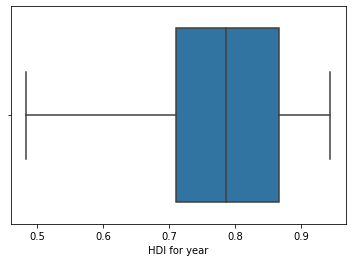

In [15]:
Q1 = df_temp_drop['HDI for year'].quantile(0.25)
Q3 = df_temp_drop['HDI for year'].quantile(0.75)
IQR = Q3 - Q1
print("Outliers Number in HDI for year: ", ((df_temp_drop['HDI for year'] < (Q1 - 1.5 * IQR)) | (df_temp_drop['HDI for year'] > (Q3 + 1.5 * IQR))).sum(), "out of ", df_temp_drop['HDI for year'].shape[0])
sns.boxplot(x=df_temp_drop['HDI for year'])

In [16]:
##Replaced outliers in HDI for year
whisker1=Q1-1.5*IQR
for i in (np.where((df_temp_drop['HDI for year'] < whisker1))):
    df_temp_drop.iloc[i, df_temp_drop.columns.get_loc('HDI for year')]= whisker1
whisker2=Q3+1.5*IQR
for i in (np.where((df_temp_drop['HDI for year'] > whisker2))): 
    df_temp_drop.iloc[i, df_temp_drop.columns.get_loc('HDI for year')]= whisker2
len(np.where((((df_temp_drop['HDI for year'] <(Q1-1.5*IQR)) | (df_temp_drop['HDI for year'] >(Q3+1.5*IQR)))))[0])

0

Outliers Number in HDI for year:  806 out of  6364


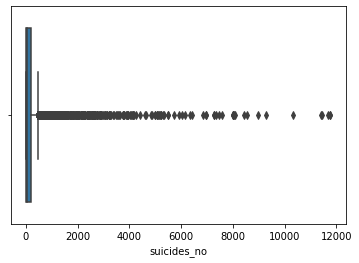

In [17]:
Q11 = df_temp_drop['suicides_no'].quantile(0.25)
Q31 = df_temp_drop['suicides_no'].quantile(0.75)
IQR1 = Q31 - Q11
print("Outliers Number in HDI for year: ", ((df_temp_drop['suicides_no'] < (Q11 - 1.5 * IQR1)) | (df_temp_drop['suicides_no'] > (Q31 + 1.5 * IQR1))).sum(), "out of ", df_temp_drop['suicides_no'].shape[0])
sns.boxplot(x=df_temp_drop['suicides_no'])

In [18]:
##Replaced outliers in suicides_no
whisker11=Q11-1.5*IQR1
for i in (np.where((df_temp_drop['suicides_no'] < whisker11))):
    df_temp_drop.iloc[i, df_temp_drop.columns.get_loc('suicides_no')]= whisker11
whisker21=Q31+1.5*IQR1
for i in (np.where((df_temp_drop['suicides_no'] > whisker21))): 
    df_temp_drop.iloc[i, df_temp_drop.columns.get_loc('suicides_no')]= whisker21
len(np.where((((df_temp_drop['suicides_no'] <(Q11-1.5*IQR1)) | (df_temp_drop['suicides_no'] >(Q31+1.5*IQR1)))))[0])

0

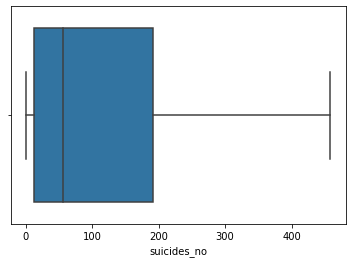

In [19]:
sns.boxplot(x=df_temp_drop['suicides_no'])

The correlation between HDI and suicides_no after dropping columns with missing values and replacing outliers with whiskers is:  0.162


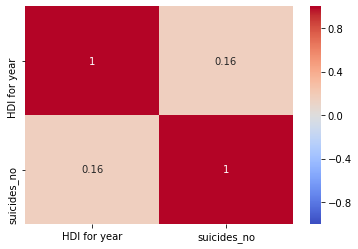

In [20]:
#ax.get_ylim()
ax=sns.heatmap(df_temp_drop.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm') 
ax.set_ylim(2.0, 0) 
print('The correlation between HDI and suicides_no after dropping columns with missing values and replacing outliers with whiskers is: ', round(df_temp_drop['suicides_no'].corr(df_temp_drop['HDI for year']), 3))

In [21]:
##Deleting rows having outliers in HDI for year or suicides_no based on IQR Score method
for i in (np.where((df_temp_drop_drop['HDI for year'] < whisker1) | (df_temp_drop_drop['HDI for year'] > whisker2))):
    df_temp_drop_drop.drop(df_temp_drop_drop.index[i],inplace=True) 
for i in (np.where((df_temp_drop_drop['suicides_no'] < whisker11) | (df_temp_drop_drop['suicides_no'] > whisker21))):
    df_temp_drop_drop.drop(df_temp_drop_drop.index[i],inplace=True) 
len(np.where((((df_temp_drop_drop['HDI for year'] <(Q1-1.5*IQR)) | (df_temp_drop_drop['HDI for year'] >(Q3+1.5*IQR)))))[0]) , len(np.where((((df_temp_drop_drop['suicides_no'] <(Q11-1.5*IQR1)) | (df_temp_drop_drop['suicides_no'] >(Q31+1.5*IQR1)))))[0])

(0, 0)

The correlation between HDI and suicides_no after dropping columns with missing values and dropping outliers is:  0.108


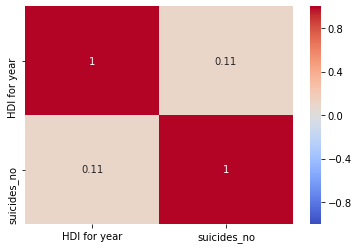

In [22]:
#ax.get_ylim()
ax=sns.heatmap(df_temp_drop_drop.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm') 
ax.set_ylim(2.0, 0) 
print('The correlation between HDI and suicides_no after dropping columns with missing values and dropping outliers is: ', round(df_temp_drop_drop['suicides_no'].corr(df_temp_drop_drop['HDI for year']), 3))

### 3. Which generation has the highest number of suicides/100k pop?


In [12]:
print("Let's first impute COUNTRYWISE, with mean of 'HDI for year' FOR THAT COUNTRY for countries for which atleast 40% data is available and for all the rest, imputing doesn't seem so wise, so we simply drop")
df_temp_mean = df_temp.copy() 
df_temp_mean['HDI for year'] = df_suicide.groupby('country')['HDI for year'].transform(lambda x: x.fillna(more_outliers(x)))
df_temp_mean['HDI for year'] = df_suicide.groupby('country')['HDI for year'].transform(lambda x: x.replace(' ', more_outliers(x)))
df_temp_mean = df_temp_mean.dropna()
df_temp_mean['HDI for year'].isnull().sum() 

Let's first impute COUNTRYWISE, with mean of 'HDI for year' FOR THAT COUNTRY for countries for which atleast 40% data is available and for all the rest, imputing doesn't seem so wise, so we simply drop


0

In [23]:
df_temp = df_suicide[[ 'generation', 'suicides/100k pop', 'country', 'sex', 'age', 'country-year']].copy()
df_temp.head(5)

,generation,suicides/100k pop,country,sex,age,country-year
0,Generation X,6.71,Albania,male,15-24 years,Albania1987
1,Silent,5.19,Albania,male,35-54 years,Albania1987
2,Generation X,4.83,Albania,female,15-24 years,Albania1987
3,G.I. Generation,4.59,Albania,male,75+ years,Albania1987
4,Boomers,3.28,Albania,male,25-34 years,Albania1987


In [24]:
df_temp.duplicated().sum()

0

In [25]:
df_temp = df_suicide[[ 'generation', 'suicides/100k pop', 'year']].copy()
df_temp.head(5)

,generation,suicides/100k pop,year
0,Generation X,6.71,1987
1,Silent,5.19,1987
2,Generation X,4.83,1987
3,G.I. Generation,4.59,1987
4,Boomers,3.28,1987


In [26]:
print("generation : missing values: ", df_temp['generation'].isnull().sum(), " which is ", round((df_temp['generation'].isnull().sum()*100)/df_temp['generation'].shape[0],2),"% of the total number of entries in generation")
print("suicides/100k pop : missing values: ", df_temp['suicides/100k pop'].isnull().sum(), " which is ", round((df_temp['suicides/100k pop'].isnull().sum()*100)/df_temp['suicides/100k pop'].shape[0],2),"% of the total number of entries in suicides/100k pop")

generation : missing values:  0  which is  0.0 % of the total number of entries in generation
suicides/100k pop : missing values:  0  which is  0.0 % of the total number of entries in suicides/100k pop


In [27]:
df_temp.groupby('generation').first(g)

,suicides/100k pop,year
generation,,
Boomers,3.28,1987
G.I. Generation,4.59,1987
Generation X,6.71,1987
Generation Z,1.47,2007
Millenials,0.00,1992
Silent,5.19,1987


In [28]:
df_temp.groupby(['generation','year']).sum().groupby('generation').sum().sort_values("suicides/100k pop",ascending = False)

,suicides/100k pop
generation,
Silent,117217.55
Boomers,73563.05
Generation X,67648.45
G.I. Generation,65708.86
Millenials,31461.74
Generation Z,944.18


In [29]:
print("Generation having highest total number of suicides/100k pop is : ", df_temp.groupby(['generation','year']).sum().groupby('generation').sum().sort_values("suicides/100k pop",ascending = False).head(1).reset_index().iloc[0,0])

Generation having highest total number of suicides/100k pop is :  Silent


In [30]:
df_temp.groupby(['generation','year']).sum().groupby('generation').mean().sort_values("suicides/100k pop",ascending = False)

,suicides/100k pop
generation,
G.I. Generation,4106.803750
Silent,3663.048437
Boomers,2373.001613
Generation X,2114.014062
Millenials,1210.066923
Generation Z,104.908889


In [31]:
print("Generation having highest (average) (annual) number of suicides/100k pop is : ", df_temp.groupby(['generation','year']).sum().groupby('generation').mean().sort_values("suicides/100k pop",ascending = False).head(1).reset_index().iloc[0,0])

Generation having highest (average) (annual) number of suicides/100k pop is :  G.I. Generation


### 4. Which country has the least number of suicides between 1990-1995?


In [32]:
df_temp = df_suicide[[ 'year', 'suicides_no', 'country', 'sex', 'age', 'country-year']].copy()
df_temp.head(5)

,year,suicides_no,country,sex,age,country-year
0,1987,21,Albania,male,15-24 years,Albania1987
1,1987,16,Albania,male,35-54 years,Albania1987
2,1987,14,Albania,female,15-24 years,Albania1987
3,1987,1,Albania,male,75+ years,Albania1987
4,1987,9,Albania,male,25-34 years,Albania1987


In [33]:
df_temp.duplicated().sum()

0

In [34]:
df_temp = df_suicide[['year', 'suicides_no', 'country']].copy()
df_temp.head(5)

,year,suicides_no,country
0,1987,21,Albania
1,1987,16,Albania
2,1987,14,Albania
3,1987,1,Albania
4,1987,9,Albania


In [35]:
print("year : missing values: ", df_temp['year'].isnull().sum(), " which is ", round((df_temp['year'].isnull().sum()*100)/df_temp['year'].shape[0],2),"% of the total number of entries in year")
print("suicides_no : missing values: ", df_temp['suicides_no'].isnull().sum(), " which is ", round((df_temp['suicides_no'].isnull().sum()*100)/df_temp['suicides_no'].shape[0],2),"% of the total number of entries in suicides_no")
print("country : missing values: ", df_temp['country'].isnull().sum(), " which is ", round((df_temp['country'].isnull().sum()*100)/df_temp['country'].shape[0],2),"% of the total number of entries in country")

year : missing values:  0  which is  0.0 % of the total number of entries in year
suicides_no : missing values:  0  which is  0.0 % of the total number of entries in suicides_no
country : missing values:  0  which is  0.0 % of the total number of entries in country


In [36]:
df_temp.loc[(df_temp['year']>1990) & (df_temp['year']<1995)].groupby('country', as_index=False)['suicides_no'].sum().sort_values("suicides_no",ascending = True)

,country,suicides_no
58,Saint Kitts and Nevis,0
36,Jamaica,1
1,Antigua and Barbuda,1
28,Grenada,7
7,Bahamas,10
...,...,...
68,Ukraine,48661
26,Germany,52876
37,Japan,81633
70,United States,123468


In [37]:
print('The country having least number of suicides between 1990-1995 (not including 1990 and 1995) is : ', df_temp.loc[(df_temp['year']>1990) & (df_temp['year']<1995)].groupby('country', as_index=False)['suicides_no'].sum().sort_values("suicides_no",ascending = True).head(1).reset_index().iloc[0,1])

The country having least number of suicides between 1990-1995 (not including 1990 and 1995) is :  Saint Kitts and Nevis


### 5. Are there any countries with no suicides recorded?  Create a new data frame which ranks these countries by HDI.


In [38]:
#Since only one new data frame has to be created and ranking has to be done by HDI,
#it has been avoided to rank countries year wise
#NaN values in HDI have been dropped and
#The countries with valid HDI values have been ranked based on mean of these HDI values
#for all years for that country for which data is available
df_temp = df_suicide[['country', 'suicides_no', 'HDI for year','year']].copy()
df_temp.head(5)

,country,suicides_no,HDI for year,year
0,Albania,21,NaN,1987
1,Albania,16,NaN,1987
2,Albania,14,NaN,1987
3,Albania,1,NaN,1987
4,Albania,9,NaN,1987


In [39]:
print("The countries with no suicides recorded in atleast one year: ", end="\n")
print(df_temp.loc[df_temp['suicides_no']==0].drop_duplicates(["country"]).reset_index()['country']) 

The countries with no suicides recorded in atleast one year: 
0                  Albania
1      Antigua and Barbuda
2                  Armenia
3                    Aruba
4                Australia
              ...         
77     Trinidad and Tobago
78            Turkmenistan
79    United Arab Emirates
80          United Kingdom
81                 Uruguay
Name: country, Length: 82, dtype: object


In [40]:
print("New DATAFRAME: ", end="\n")
new_df = df_temp.loc[df_temp['suicides_no']==0].dropna().groupby('country')[['HDI for year']].mean().sort_values("HDI for year",ascending = False).reset_index().copy()
new_df.index = np.arange(1, len(new_df)+1)
#new_df[new_df.duplicated(['country'])]
print(new_df)

New DATAFRAME: 
        country  HDI for year
1        Norway      0.912000
2   Switzerland      0.900250
3       Denmark      0.896375
4   Netherlands      0.877000
5     Singapore      0.876429
..          ...           ...
61     Paraguay      0.623833
62    Nicaragua      0.623333
63   Azerbaijan      0.615200
64       Guyana      0.598750
65    Guatemala      0.579167

[65 rows x 2 columns]


In [41]:
df_temp1 = df_suicide[['country', 'suicides_no', 'HDI for year','year']].copy()
#print(df_temp1[df_temp1.groupby('year')['suicides_no'].sum() == 0]) 
df_ = df_temp1.groupby(['country'])['suicides_no'].sum().sort_values(ascending=True).reset_index()
df_ = df_[df_['suicides_no'] == 0]
print("The countries with no record of suicide in all the years:\n")
df_.iloc[:,0]

The countries with no record of suicide in all the years:



0                 Dominica
1    Saint Kitts and Nevis
Name: country, dtype: object

In [42]:
for var in df_['country']:
    print(df_temp1[df_temp1['country'] == var]['HDI for year'].mean())

nan
nan


In [43]:
print("Clearly data not available for these countries to rank based on HDI")

Clearly data not available for these countries to rank based on HDI


### 6. Generate suitable graphs for comparing suicides between men and women for the top 5 countries with the highest suicide rate per 100,000.


In [44]:
df_temp = df_suicide[[ 'country', 'year', 'suicides/100k pop', 'suicides_no', 'sex']].dropna().copy()
df_temp.head(5)

,country,year,suicides/100k pop,suicides_no,sex
0,Albania,1987,6.71,21,male
1,Albania,1987,5.19,16,male
2,Albania,1987,4.83,14,female
3,Albania,1987,4.59,1,male
4,Albania,1987,3.28,9,male


In [45]:
print('Top 5 Countries with highest (average) (annual) suicide rate per 100K population: ')
#print(df_temp.groupby(['country','year','sex'])['suicides/100k pop'].sum().reset_index().groupby(['country','year'])['suicides/100k pop'].sum())
df__ = df_temp.groupby(['country','year','sex'])['suicides/100k pop'].sum().reset_index().groupby(['country','year'])['suicides/100k pop'].sum().groupby(['country']).mean().sort_values(ascending=False).reset_index().head(5)
#df__['male'] = np.nan 
#df__['female'] = np.nan
#df__['female'] = np.nan 
print(df__) 

Top 5 Countries with highest (average) (annual) suicide rate per 100K population: 
              country  suicides/100k pop
0           Lithuania         481.312727
1           Sri Lanka         423.541818
2  Russian Federation         418.708519
3             Hungary         390.618077
4             Belarus         372.910952


In [46]:
df__1=df__.copy()
df__1 = df__1.append(df__,ignore_index=True) 
df__1['sex'] = np.nan
df__1['sex_suicide_no'] = np.nan
df__1['suicides_no'] = np.nan
print(df__1) 


              country  suicides/100k pop  sex  sex_suicide_no  suicides_no
0           Lithuania         481.312727  NaN             NaN          NaN
1           Sri Lanka         423.541818  NaN             NaN          NaN
2  Russian Federation         418.708519  NaN             NaN          NaN
3             Hungary         390.618077  NaN             NaN          NaN
4             Belarus         372.910952  NaN             NaN          NaN
5           Lithuania         481.312727  NaN             NaN          NaN
6           Sri Lanka         423.541818  NaN             NaN          NaN
7  Russian Federation         418.708519  NaN             NaN          NaN
8             Hungary         390.618077  NaN             NaN          NaN
9             Belarus         372.910952  NaN             NaN          NaN


In [47]:
i=0
for var in df__['country']: 
    df__1.iloc[i, df__1.columns.get_loc('sex_suicide_no')] = a = df_temp[df_temp['country']==var].groupby(['country','year','sex'])['suicides_no'].sum().reset_index().groupby(['country','sex'])['suicides_no'].sum().reset_index().iloc[1,2]
    df__1.iloc[i+5, df__1.columns.get_loc('sex_suicide_no')] = b = df_temp[df_temp['country']==var].groupby(['country','year','sex'])['suicides_no'].sum().reset_index().groupby(['country','sex'])['suicides_no'].sum().reset_index().iloc[0,2]
    df__1.iloc[i, df__1.columns.get_loc('suicides_no')] = a+b
    df__1.iloc[i+5, df__1.columns.get_loc('suicides_no')] = a+b
    df__1.iloc[i, df__1.columns.get_loc('sex')] = "male"
    df__1.iloc[i+5, df__1.columns.get_loc('sex')] = "female"
    i+=1
print("Total number of suicides (from 1985 - 2016) by males and females for Top 5 countries\nhaving highest (average) (annual) suicide rate per 100k population : ")
df__1

Total number of suicides (from 1985 - 2016) by males and females for Top 5 countries
having highest (average) (annual) suicide rate per 100k population : 


,country,suicides/100k pop,sex,sex_suicide_no,suicides_no
0,Lithuania,481.312727,male,23028.0,28039.0
1,Sri Lanka,423.541818,male,42043.0,55641.0
2,Russian Federation,418.708519,male,995412.0,1209742.0
3,Hungary,390.618077,male,55776.0,73891.0
4,Belarus,372.910952,male,49890.0,59892.0
5,Lithuania,481.312727,female,5011.0,28039.0
6,Sri Lanka,423.541818,female,13598.0,55641.0
7,Russian Federation,418.708519,female,214330.0,1209742.0
8,Hungary,390.618077,female,18115.0,73891.0
9,Belarus,372.910952,female,10002.0,59892.0


In [48]:
df_d=pd.DataFrame()
for var in df__['country']:
    df_d  = df_d.append(df_temp[df_temp['country']==var] , ignore_index=True)
df_d

,country,year,suicides/100k pop,suicides_no,sex
0,Lithuania,1995,144.85,632,male
1,Lithuania,1995,141.91,67,male
2,Lithuania,1995,118.53,325,male
3,Lithuania,1995,79.37,226,male
4,Lithuania,1995,50.80,134,male
...,...,...,...,...,...
1275,Belarus,2014,5.91,68,female
1276,Belarus,2014,5.50,41,female
1277,Belarus,2014,2.74,15,female
1278,Belarus,2014,1.32,6,female


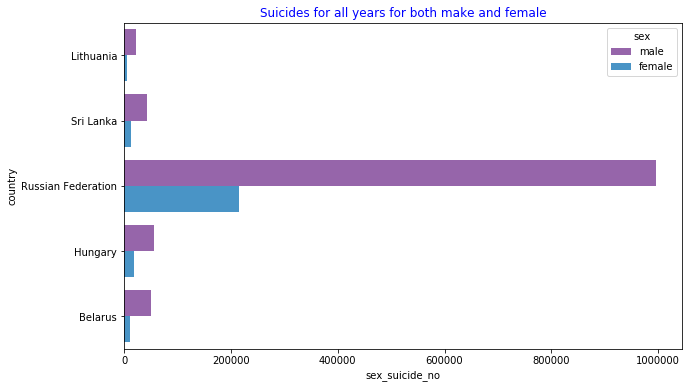

In [49]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot( "sex_suicide_no", "country", data=df__1, hue="sex", palette=["#9b59b6", "#3498db"], linewidth=1) 
plt.title("Suicides for all years for both make and female", color="b")
plt.show()


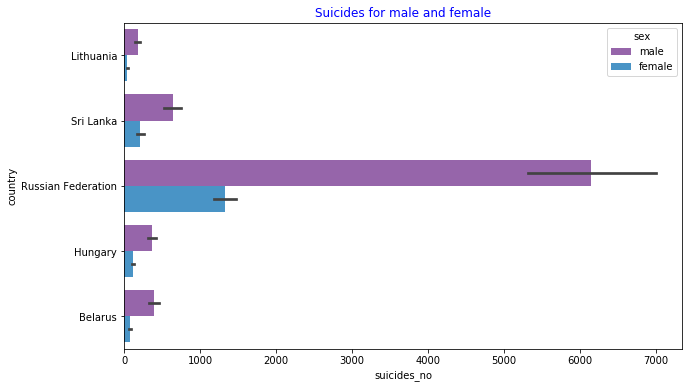

In [50]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot( "suicides_no", "country", data=df_d, hue="sex", palette=["#9b59b6", "#3498db"], linewidth=1) 
plt.title("Suicides for male and female", color="b")
plt.show()


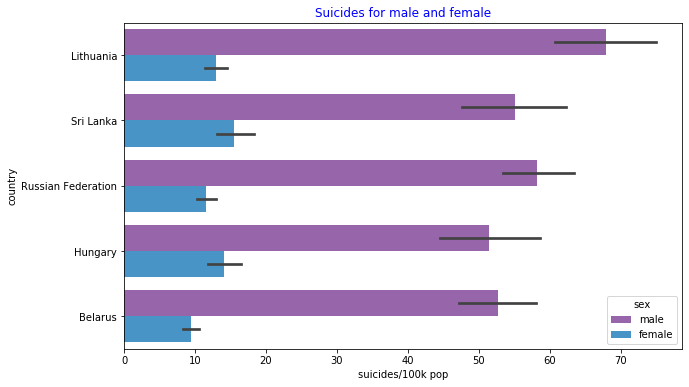

In [51]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot( "suicides/100k pop", "country", data=df_d, hue="sex", palette=["#9b59b6", "#3498db"], linewidth=1) 
plt.title("Suicides for male and female", color="b")
plt.show()

Total suicides for all years: 


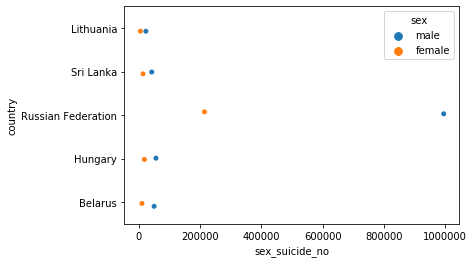

In [52]:
print('Total suicides for all years: ')
sns.stripplot(x="sex_suicide_no", y="country", hue="sex", data=df__1)

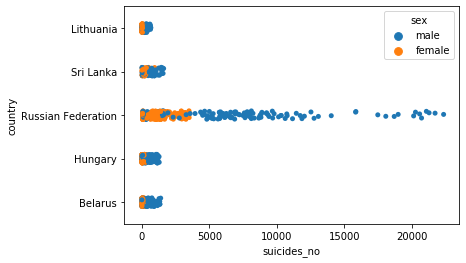

In [53]:
sns.stripplot(x="suicides_no", y="country", hue="sex", data=df_d)

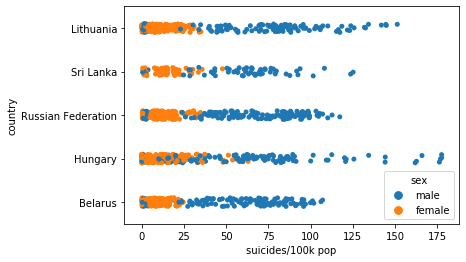

In [54]:
sns.stripplot(x="suicides/100k pop", y="country", hue="sex", data=df_d)

Total suicides for all years:


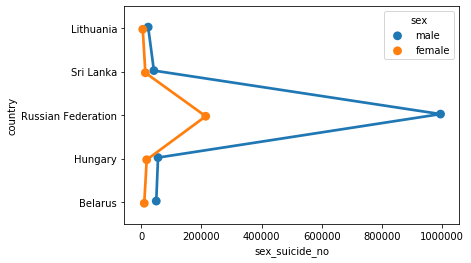

In [55]:
print("Total suicides for all years:")
sns.pointplot(x="sex_suicide_no", y="country", hue="sex", data=df__1, dodge=True)

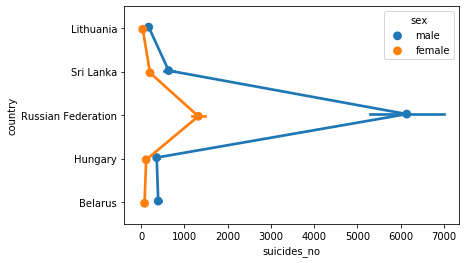

In [56]:
sns.pointplot(x="suicides_no", y="country", hue="sex", data=df_d, dodge=True)

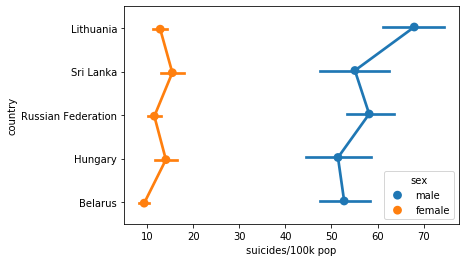

In [57]:
sns.pointplot(x="suicides/100k pop", y="country", hue="sex", data=df_d, dodge=True)

### 7. Are there any redundant columns in the dataset? Which coulmn is it? Can that column be dropped? State your reasons.


In [58]:
#df_suicide
print('The columns having row-wise redundancy are: ')
for var in df_suicide.columns:
    if df_suicide[var].duplicated().any()==True:
        print("*************")
        print(var)
        print("*************\nUnique values for this column: \n",df_suicide[var].unique())

The columns having row-wise redundancy are: 
*************
country
*************
Unique values for this column: 
 ['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lu

In [59]:
print('Row-wise redundancy: There is redundancy in almost every column. Redundancy can be avoided by creating a primary key and splitting the dataframe into multiple dataframes linked by that primary key. Here, if we drop duplicates in country, we lose important data such as suicide_no for multiple years. Similarly, if we remove redundancy in generation, we cannot study suicide_no for various generations countrywise. They can be removed, however, in certain situations, e.g., when we are trying to study correlation between a categorical and a numerical variable. But, if we drop the whole column, it results in loss of important data, if we are trying to study other columns in relation to that column. But, if we don\'t need that column, it can sure be dropped. E.g, If our sole purpose is to study correlation between HDI and suicides_no, then there is no need of other columns.')
print('\nColumn-wise redundancy: Then, there are columns such as \'country\', \'year\' and \'country-year\', one of which can be safely removed as the values of one can be obtained from the other one/ two, e.g., by selecting string.[-4:] and then converting the data type into int64, we can get year from country- year. Also, there are columns like \'population\', \'gdp_per_capita ($)\' and \' gdp_for_year ($) \', one of which can be removed as we can easily find one from other two, e.g, gdp per capita = gdp/population. Similarly one of \'suicides_no\', \'population\' and \'suicides/100k pop\' can be dropped.')


Row-wise redundancy: There is redundancy in almost every column. Redundancy can be avoided by creating a primary key and splitting the dataframe into multiple dataframes linked by that primary key. Here, if we drop duplicates in country, we lose important data such as suicide_no for multiple years. Similarly, if we remove redundancy in generation, we cannot study suicide_no for various generations countrywise. They can be removed, however, in certain situations, e.g., when we are trying to study correlation between a categorical and a numerical variable. But, if we drop the whole column, it results in loss of important data, if we are trying to study other columns in relation to that column. But, if we don't need that column, it can sure be dropped. E.g, If our sole purpose is to study correlation between HDI and suicides_no, then there is no need of other columns.

Column-wise redundancy: Then, there are columns such as 'country', 'year' and 'country-year', one of which can be safely 

### 8. Please obtain the distribution of suicides for each age group for Argentina. Plot these as graphs


In [60]:
df_temp=df_suicide[df_suicide['country'] == 'Argentina'][['age','suicides_no']].dropna().drop_duplicates().copy()
df_temp.head()

,age,suicides_no
588,75+ years,202
589,55-74 years,485
590,35-54 years,414
591,55-74 years,210
592,25-34 years,177


Categorical distribution plot: 


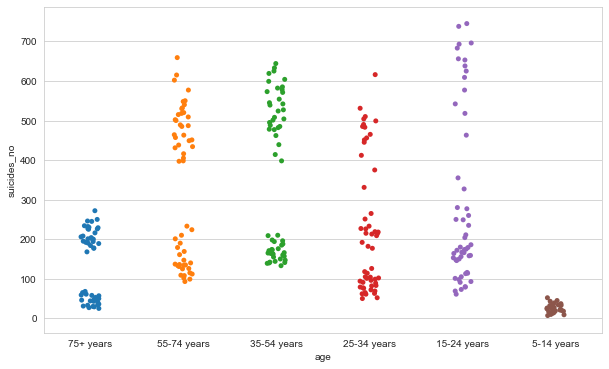

In [61]:
print("Categorical distribution plot: ")
sns.set_style('whitegrid') 
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.stripplot(x="age", y="suicides_no", data=df_temp)

Categorical scatter plot: 


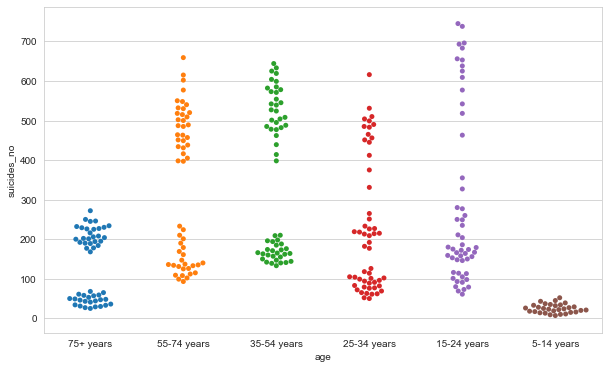

In [62]:
print("Categorical scatter plot: ")
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.swarmplot(x="age", y="suicides_no", data=df_temp)

Categorical distribution plot: 


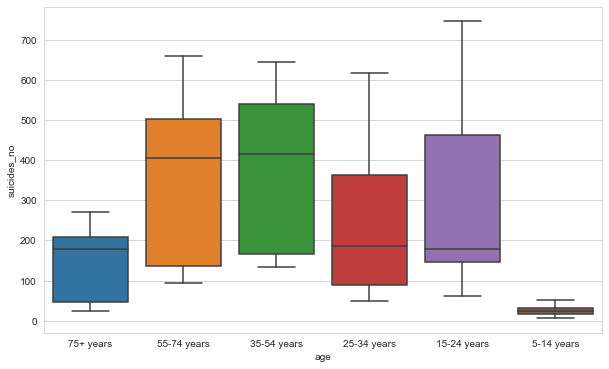

In [63]:
print("Categorical distribution plot: ")
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.boxplot(x="age", y="suicides_no", data=df_temp)

Categorical distribution plot: 


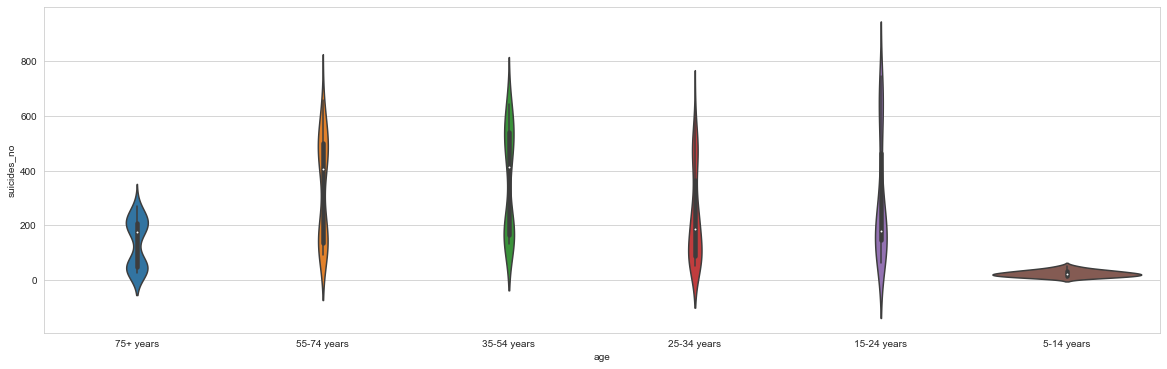

In [64]:
print("Categorical distribution plot: ")
fig, ax = plt.subplots(figsize=(20,6))
ax = sns.violinplot(x="age", y="suicides_no", data=df_temp)

Categorical distribution plot: 


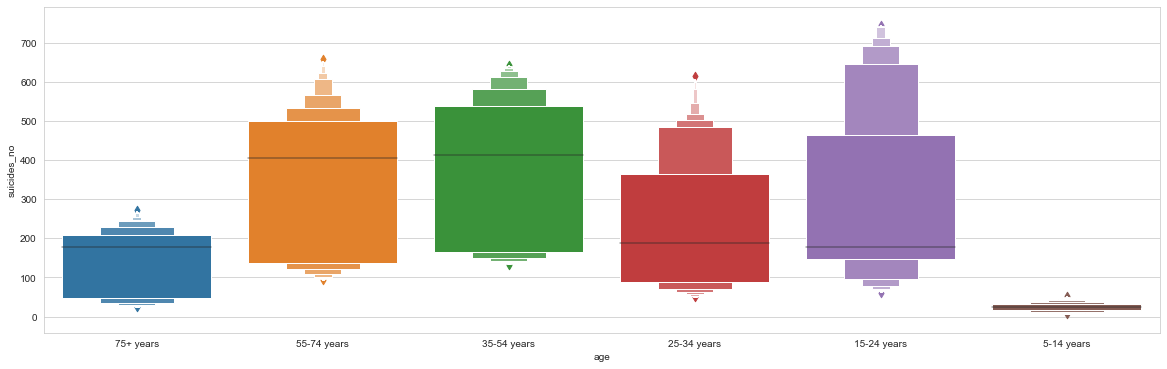

In [65]:
print("Categorical distribution plot: ")
fig, ax = plt.subplots(figsize=(20,6))
ax = sns.boxenplot(x="age", y="suicides_no", data=df_temp)

### 9. Generate a correlation heatmap for the dataset. Which pairs of variables are highly correlated.


(6, 0)

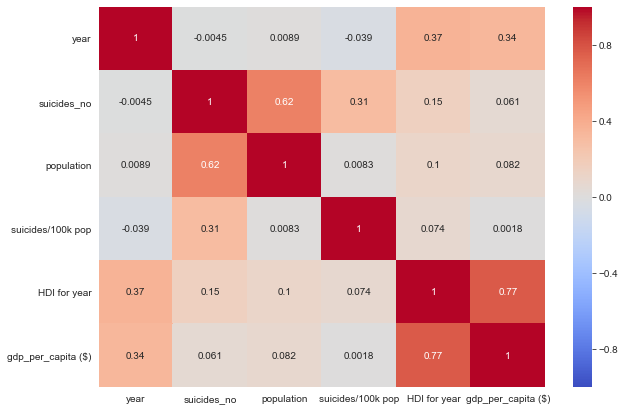

In [66]:
#sns.heatmap(df_suicide.corr())
fig, ax = plt.subplots(figsize=(10,7))
ax=sns.heatmap(df_suicide.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm') 
#ax.get_ylim()
ax.set_ylim(6, 0) 

In [67]:
print('The pairs of variables which are highly correlated are : gdp_per_capita ($) and HDI for year with a correlation of 0.77, population and suicides_no with a correlation of 0.62')

The pairs of variables which are highly correlated are : gdp_per_capita ($) and HDI for year with a correlation of 0.77, population and suicides_no with a correlation of 0.62


### 10. Generate the following tables:



#### a) A table containing the columns ‘Country’, ‘Year’, ‘Total suicides’. Total Suicides has to be calculated from the existing table.

In [68]:
df_new = df_suicide.groupby(['country','year'])['suicides_no'].sum().reset_index().copy()
df_new= df_new.rename(columns={'suicides_no': 'Total suicides', 'country':'Country','year':'Year'})
df_new.head(5) 

,Country,Year,Total suicides
0,Albania,1987,73
1,Albania,1988,63
2,Albania,1989,68
3,Albania,1992,47
4,Albania,1993,73


#### b) A Table containing the columns ‘Country’, ‘Year’, ‘per capita gdp’.

In [69]:
df_new2 = df_suicide.groupby(['country','year'])['gdp_per_capita ($)'].first().reset_index().copy()
df_new2= df_new2.rename(columns={'gdp_per_capita ($)': 'per capita gdp', 'country':'Country','year':'Year'})
df_new2.head(5)

,Country,Year,per capita gdp
0,Albania,1987,796
1,Albania,1988,769
2,Albania,1989,833
3,Albania,1992,251
4,Albania,1993,437


#### c) Merge the above two tables using ‘Country’ as the merge column.

In [70]:
merged = pd.merge(df_new, df_new2, on='Country', how="inner").rename(columns={'Year_x':'Year'}).drop_duplicates(subset=('Country','Year','per capita gdp'), keep='first', inplace=False).drop_duplicates(subset=('Country','Year','per capita gdp'), keep='first', inplace=False)
merged = merged[merged['Year'] == merged['Year_y']].drop(columns=['Year_y']).reset_index().drop(columns=['index'])
merged.head()

,Country,Year,Total suicides,per capita gdp
0,Albania,1987,73,796
1,Albania,1988,63,769
2,Albania,1989,68,833
3,Albania,1992,47,251
4,Albania,1993,73,437


------------------------------

# ----------------------------------- Happy Learning -----------------------------------------